In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

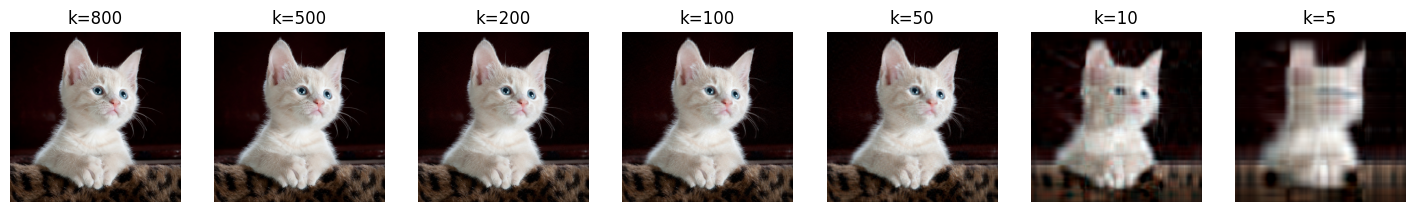

In [5]:
plt.figure(figsize=(18, 4))
im = plt.imread("./cat.jpg")
ks = [800, 500, 200, 100, 50, 10, 5]        # 分别截取不同的 k
for idx, k in enumerate(ks):
    svd_image = []
    for ch in range(3):                     # 注意，有RGB三个维度，每个维度对应一个矩阵做SVD分解
        im_ch = im[:, :, ch]
        U, D, VT = np.linalg.svd(im_ch)
        imx = np.matmul(np.matmul(U[:, :k], np.diag(D[:k])), VT[:k, :])
        # 将像素值约束到合理范围
        imx = np.where(imx<0, 0, imx)
        imx = np.where(imx>255, 255, imx)
        svd_image.append(imx.astype('uint8'))
    img = np.stack((svd_image[0], svd_image[1], svd_image[2]), 2)
    plt.subplot(1, len(ks), idx+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title("k="+str(k))